In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [2]:
path_to_folder = r'/home/dingo/code/machine learning algorithms/TensorFlow/APPLE_DISEASE_DATASET/'
li = os.listdir(path_to_folder)
print(li)

['SCAB LEAVES', 'HEALTHY LEAVES', 'LEAF BLOTCH', 'APPLE ROT LEAVES']


In [3]:
image_list = []
for i in li:
    for j in os.listdir(path_to_folder + i):
        image_list.append(path_to_folder+i+"/"+j)

In [4]:
len(image_list)

419

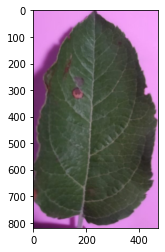

In [5]:
img0 = plt.imread(image_list[0])
plt.imshow(img0)

In [6]:
label=[]
x = []
y = []

for i in li:
    label.append(i)
    for j in os.listdir(path_to_folder+i):
        image = cv2.imread(path_to_folder+i+'/'+j)
        image = cv2.resize(image,(300,300))
        x.append(image)
        y.append(i)

x = np.array(x)
y = np.array(y)
label

['SCAB LEAVES', 'HEALTHY LEAVES', 'LEAF BLOTCH', 'APPLE ROT LEAVES']

In [7]:
y_new = []
for i in y:
    y_new.append(label.index(i))
yc = y_new
yc = tf.keras.utils.to_categorical(yc)
yc

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [8]:
x.shape, y.shape

((419, 300, 300, 3), (419,))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,yc,test_size=0.3, random_state = 1, shuffle=True)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.5),
    keras.layers.experimental.preprocessing.RandomRotation(0.4),
    keras.layers.experimental.preprocessing.RandomZoom(0.3)
])

2022-09-26 07:40:38.412562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 07:40:38.481575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 07:40:38.481715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 07:40:38.482865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

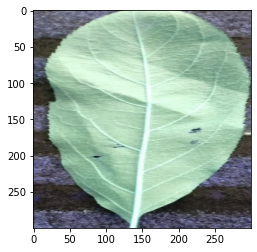

In [12]:
plt.imshow(x_train[0])

2022-09-26 07:40:39.590921: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 113130000 exceeds 10% of free system memory.


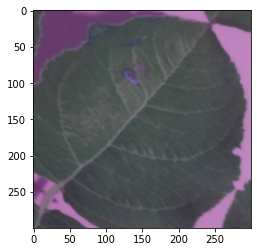

In [13]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [14]:
from keras.callbacks import ModelCheckpoint

In [15]:
filepath='my_best_model_accuracy.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
monitor = 'accuracy', verbose=1, save_best_only=True, model='min')
callbacks = [checkpoint]

model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128,3,padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(input_shape=(300,300,3)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x_train, y_train, epochs = 200, validation_split = 0.2, callbacks=callbacks)

Epoch 1/200


2022-09-26 07:40:43.915278: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 252720000 exceeds 10% of free system memory.
2022-09-26 07:40:44.100319: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 252720000 exceeds 10% of free system memory.


/home/dingo/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2022-09-26 07:40:47.524847: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-26 07:40:48.433895: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


8/8 [==============================] - ETA: 0s - loss: 1.9349 - accuracy: 0.3675

2022-09-26 07:40:52.198483: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 63720000 exceeds 10% of free system memory.
2022-09-26 07:40:52.389817: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 63720000 exceeds 10% of free system memory.



Epoch 1: accuracy improved from -inf to 0.36752, saving model to my_best_model_accuracy.hdf5
8/8 [==============================] - 10s 553ms/step - loss: 1.9349 - accuracy: 0.3675 - val_loss: 1.2912 - val_accuracy: 0.4407
Epoch 2/200
8/8 [==============================] - ETA: 0s - loss: 1.3249 - accuracy: 0.4017
Epoch 2: accuracy improved from 0.36752 to 0.40171, saving model to my_best_model_accuracy.hdf5
8/8 [==============================] - 2s 321ms/step - loss: 1.3249 - accuracy: 0.4017 - val_loss: 1.2716 - val_accuracy: 0.3898
Epoch 3/200
8/8 [==============================] - ETA: 0s - loss: 1.2598 - accuracy: 0.4188
Epoch 3: accuracy improved from 0.40171 to 0.41880, saving model to my_best_model_accuracy.hdf5
8/8 [==============================] - 2s 303ms/step - loss: 1.2598 - accuracy: 0.4188 - val_loss: 1.2138 - val_accuracy: 0.3220
Epoch 4/200
8/8 [==============================] - ETA: 0s - loss: 1.2835 - accuracy: 0.3632
Epoch 4: accuracy did not improve from 0.41880
